<a href="https://colab.research.google.com/github/ArchitTheCoder/C118/blob/main/Project_118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving C118D2.csv to C118D2.csv


In [2]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C118D2.csv")
size = data["Size"].tolist()
light = data["Light"].tolist()

fig = px.scatter(x= size, y= light)
fig.show()

In [4]:
X = data.iloc[:, [0, 1]].values
# print(X)
wcss = []
for i in range(1, 18):
  kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 40)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



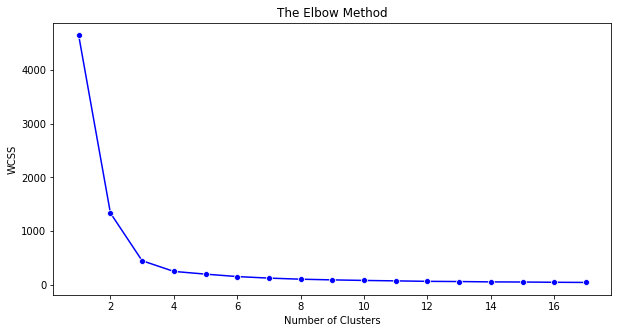

In [5]:
plt.figure(figsize= (10, 5))
sns.lineplot(range(1, 18), wcss, marker= "o", color= "blue")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
kmeans = KMeans(n_clusters= 3, init= "k-means++", random_state= 40)
y_means = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

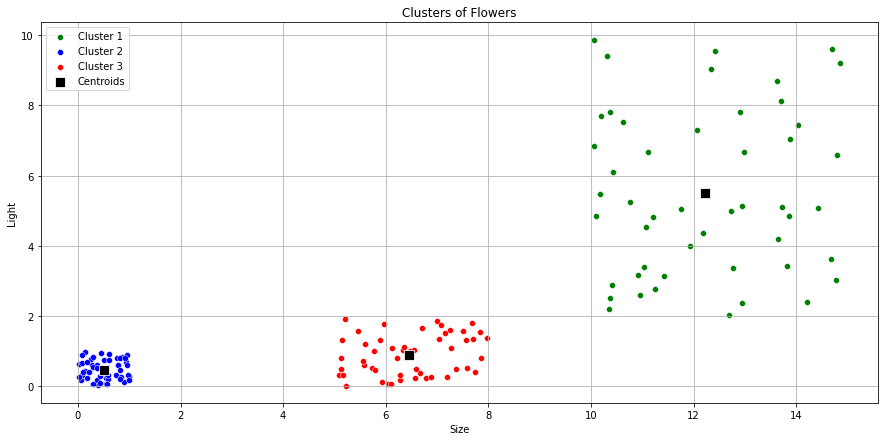

In [8]:
plt.figure(figsize= (15, 7))
sns.scatterplot(X[y_means== 0, 0], X[y_means== 0, 1], color="green", label= "Cluster 1")
sns.scatterplot(X[y_means== 1, 0], X[y_means== 1, 1], color="blue", label= "Cluster 2")
sns.scatterplot(X[y_means== 2, 0], X[y_means== 2, 1], color="red", label= "Cluster 3")
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color= "black", label= "Centroids", s= 100, marker= ",")
plt.grid(True)
plt.title("Clusters of Flowers")
plt.xlabel("Size")
plt.ylabel("Light")
plt.show()